In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [2]:
Y_A = np.genfromtxt('Y_A.txt')
Y_M = np.genfromtxt('Y_M.txt')
Y_D = np.genfromtxt('Y_D.txt')
ShR = np.genfromtxt('ShR.txt')

Y_A = Y_A.reshape((-1,1))
Y_M = Y_M.reshape((-1,1))
Y_D = Y_D.reshape((-1,1))
ShR = ShR.reshape((-1,1))

In [3]:
Sig_Yield =	7.52472E-05
Gam_TC = 	7.59573E-09
Eta_BG =	5.907778921
Gam_CA =	-7.181204281

Gama = np.transpose( np.power(10, np.linspace(2,-2,42) ) )
ST = Sig_Yield + Sig_Yield * np.sqrt( Gama/Gam_TC ) + Gama*Eta_BG * np.power( 1 + np.square(Gama/Gam_CA) , -0.5)
Vis = (ST / Gama)
Vis = Vis.reshape((-1,1))

# Flow Curves

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


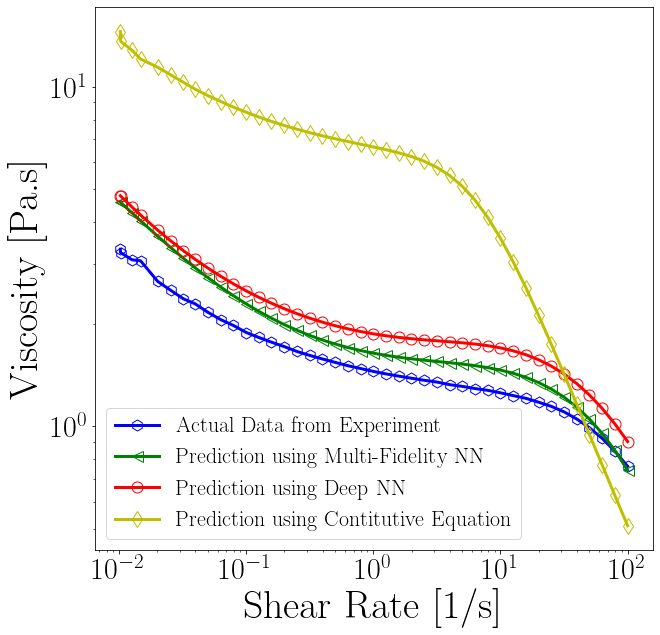

In [4]:
a=0*42
b=1*42
import matplotlib.font_manager
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

plt.figure(figsize=(10,10))

plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=22)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=22)    # legend fontsize
plt.rc('figure', titlesize=22)  # fontsize of the figure title

plt.plot(np.power(10,ShR[a:b]),np.power(10,Y_A[a:b]) , 'bh-', markerfacecolor='none', linewidth=3.0, markersize = 11.0)
plt.plot(np.power(10,ShR[a:b]),np.power(10,Y_M[a:b]) , 'g<-' , markerfacecolor='none', linewidth=3.0, markersize = 11.0)
plt.plot(np.power(10,ShR[a:b]),np.power(10,Y_D[a:b]) , 'ro-', markerfacecolor='none', linewidth=3.0, markersize = 11.0)
plt.plot(np.power(10,ShR),Vis , 'yd-', markerfacecolor='none', linewidth=3.0, markersize = 11.0)

plt.xlabel('Shear Rate [1/s]', fontname = 'Times New Roman', fontsize=40)
plt.ylabel('Viscosity [Pa.s]', fontname = 'Times New Roman', fontsize=40)
plt.legend(['Actual Data from Experiment','Prediction using Multi-Fidelity NN','Prediction using Deep NN','Prediction using Contitutive Equation'])
#plt.title('Actual and Predicted Flow Curve for a Random Batch')

plt.xticks(np.arange(0,10, 1.0),fontname = "Times New Roman", fontsize=30)
plt.yticks(fontname = "Times New Roman", fontsize=30)

plt.xscale("log")
plt.yscale("log")

plt.show()